In [1]:
import pandas as pd
import numpy as np 
from sklearn import datasets

diabtes = datasets.load_diabetes()
diabtes


{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [3]:
df = pd.DataFrame(diabtes.data)
df.columns = diabtes.feature_names
df['diabets_measure'] = diabtes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabets_measure
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [10]:
bmi = X.iloc[:, 2]
print(bmi.shape)
bmi = bmi[:,np.newaxis]
print(bmi.shape)
print(y.shape)
y=df.iloc[:, -1]
y = y[:, np.newaxis]
print(y.shape)

(442,)
(442, 1)
(442,)
(442, 1)


In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr = lr.fit(bmi, y)


In [12]:
predicted = lr.predict(bmi)

In [13]:
predicted

array([[210.71003806],
       [103.26219543],
       [194.33703347],
       [141.12476855],
       [117.58857445],
       [113.4953233 ],
       [107.35544658],
       [150.33458363],
       [210.71003806],
       [189.22046954],
       [ 72.56281182],
       [168.7542138 ],
       [124.75176395],
       [150.33458363],
       [127.82170232],
       [134.98489182],
       [192.2904079 ],
       [163.63764986],
       [142.14808133],
       [134.98489182],
       [ 98.14563149],
       [130.89164068],
       [148.28795806],
       [209.68672528],
       [186.15053118],
       [140.10145576],
       [ 78.70268854],
       [208.66341249],
       [131.91495346],
       [146.24133248],
       [194.33703347],
       [ 89.9591292 ],
       [271.0854925 ],
       [104.28550821],
       [ 92.00575477],
       [122.70513838],
       [173.87077773],
       [162.61433707],
       [219.91985315],
       [165.68427544],
       [144.19470691],
       [ 87.91250362],
       [142.14808133],
       [129

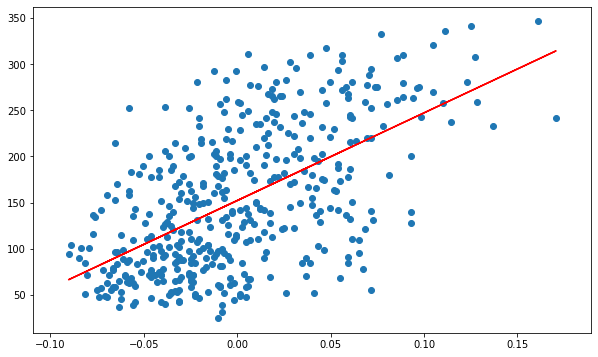

In [14]:
import matplotlib.pylab as plt
%matplotlib inline
plt.figure(figsize=(10,6))
plt.scatter(bmi, y)
plt.plot(bmi, predicted, c='r')
plt.show()

In [15]:
from sklearn.model_selection import cross_val_score
mse = cross_val_score(lr, bmi, y, scoring='neg_mean_squared_error', cv=10)
mse.mean()

-3906.91899010684